In [2]:
# Imports
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, SimpleRNN, Embedding, LSTM, Bidirectional
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.regularizers import l2

import pickle

pickle_in = open("X.pickle","rb")  # Open X data
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")  # Open y data 
y = pickle.load(pickle_in)

X = X.astype("float32")/255.0      # Make data in range 1 or less

max_features = 2304

model = Sequential()   

model.add(Flatten(input_shape=X.shape[1:]))
model.add(Embedding(max_features, 32))

model.add(LSTM(16))
model.add(Dense(1, activation="sigmoid"))

opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='binary_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

history = model.fit(X, y, batch_size=32, epochs=5, validation_split=0.1)

Epoch 1/5
272/272 [==============================] - 226s 825ms/step - loss: 0.6933 - accuracy: 0.5014 - val_loss: 0.6929 - val_accuracy: 0.5083
Epoch 2/5
272/272 [==============================] - 225s 828ms/step - loss: 0.6936 - accuracy: 0.4949 - val_loss: 0.6929 - val_accuracy: 0.5083
Epoch 3/5
272/272 [==============================] - 226s 831ms/step - loss: 0.6931 - accuracy: 0.5077 - val_loss: 0.6929 - val_accuracy: 0.5083
Epoch 4/5
272/272 [==============================] - 223s 819ms/step - loss: 0.6932 - accuracy: 0.5043 - val_loss: 0.6929 - val_accuracy: 0.5083
Epoch 5/5
272/272 [==============================] - 224s 822ms/step - loss: 0.6931 - accuracy: 0.5031 - val_loss: 0.6935 - val_accuracy: 0.4938


Text(0.5, 1.0, 'Accuracy Curves')

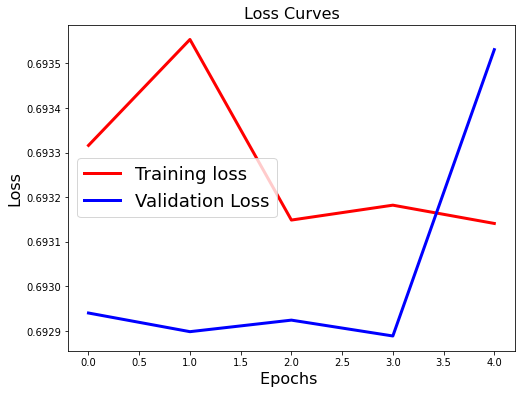

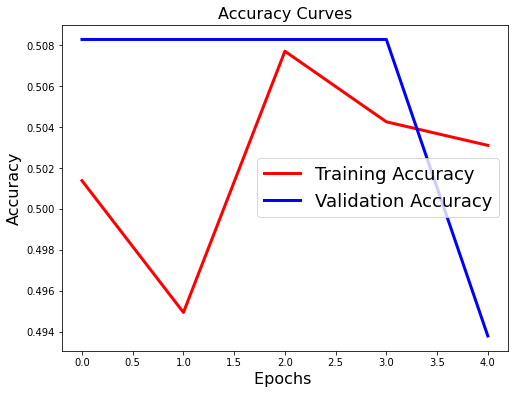

In [3]:
import matplotlib.pyplot as plt

#Plot the Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

#Plot the Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

In [5]:
model.save('LSTMClassifier.model')

INFO:tensorflow:Assets written to: LSTMClassifier.model\assets


INFO:tensorflow:Assets written to: LSTMClassifier.model\assets
